## Train-Test Split Analysis

One final analysis would be to check how would the data distribution look like once we have split the dataset.

According to the paper, it was a 70/30 split

In [1]:
# Import basic libraries for EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import os

In [2]:
# Import dataset
load_dotenv()
dataset_path=os.getenv("DATASET_PATH_TWO_M")
dataset = pd.read_csv(dataset_path)
dataset.head()

,Gender,Age,DIAGNOSIS,MMSE,Hip ASM,Hip Contrast,Hip Correlation,Hip Variance,Hip Sum Average,Hip Sum Variance,...,ERC CONTRAST,ERC CORRELATION,ERC VARIANCE,ERC SUM AVERAGE,ERC SUM VARIANCE,ERC ENTROPY,ERC CLUSTER SHADE,ERCs_thicknessbaseline,ERCsVolumebaseline,TOTAL_HIPPOCAMPUS_VOLUME
0,0,65.149895,0,30.0,0.460200,83.371297,0.508610,89.066304,10.318461,272.893918,...,245.139997,0.385395,209.332939,41.129640,592.191757,3.234648,18110.527190,6.948,2826.0,6861.9
1,1,67.206024,0,30.0,0.329647,149.712265,0.328176,109.824210,13.761403,289.584573,...,221.932844,0.406722,197.689209,42.149774,568.823992,3.240436,23801.869010,7.090,3792.0,7378.1
2,0,58.773440,0,30.0,0.385797,104.769354,0.545986,125.678783,15.521177,397.945779,...,283.711655,0.336695,217.002950,41.289080,584.300146,3.069283,17579.374770,6.832,2964.0,7983.5
3,0,55.096508,0,30.0,0.229011,166.953431,0.275601,112.186834,18.126786,281.793906,...,231.188679,0.498026,232.827358,33.062621,700.120751,3.093719,4888.606116,6.523,3184.0,8525.1
4,0,48.030117,0,29.0,0.242913,86.816221,0.377439,73.484651,13.463920,207.122381,...,245.120671,0.458936,233.016858,44.574015,686.946759,3.149858,22134.931110,8.253,3419.0,9320.5


In [3]:
# Split dataset
from sklearn.model_selection import train_test_split

copy_dataset = dataset.copy()

X = copy_dataset.drop(columns = ["DIAGNOSIS"])
y = copy_dataset["DIAGNOSIS"]

X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X, 
                                                    y, 
                                                    test_size = .30, 
                                                    random_state = 42,
)

X_train_vis.shape, X_test_vis.shape, y_train_vis.shape, y_test_vis.shape

((947, 22), (407, 22), (947,), (407,))

### Input feature analysis

Lets see how our data looks now after we split it

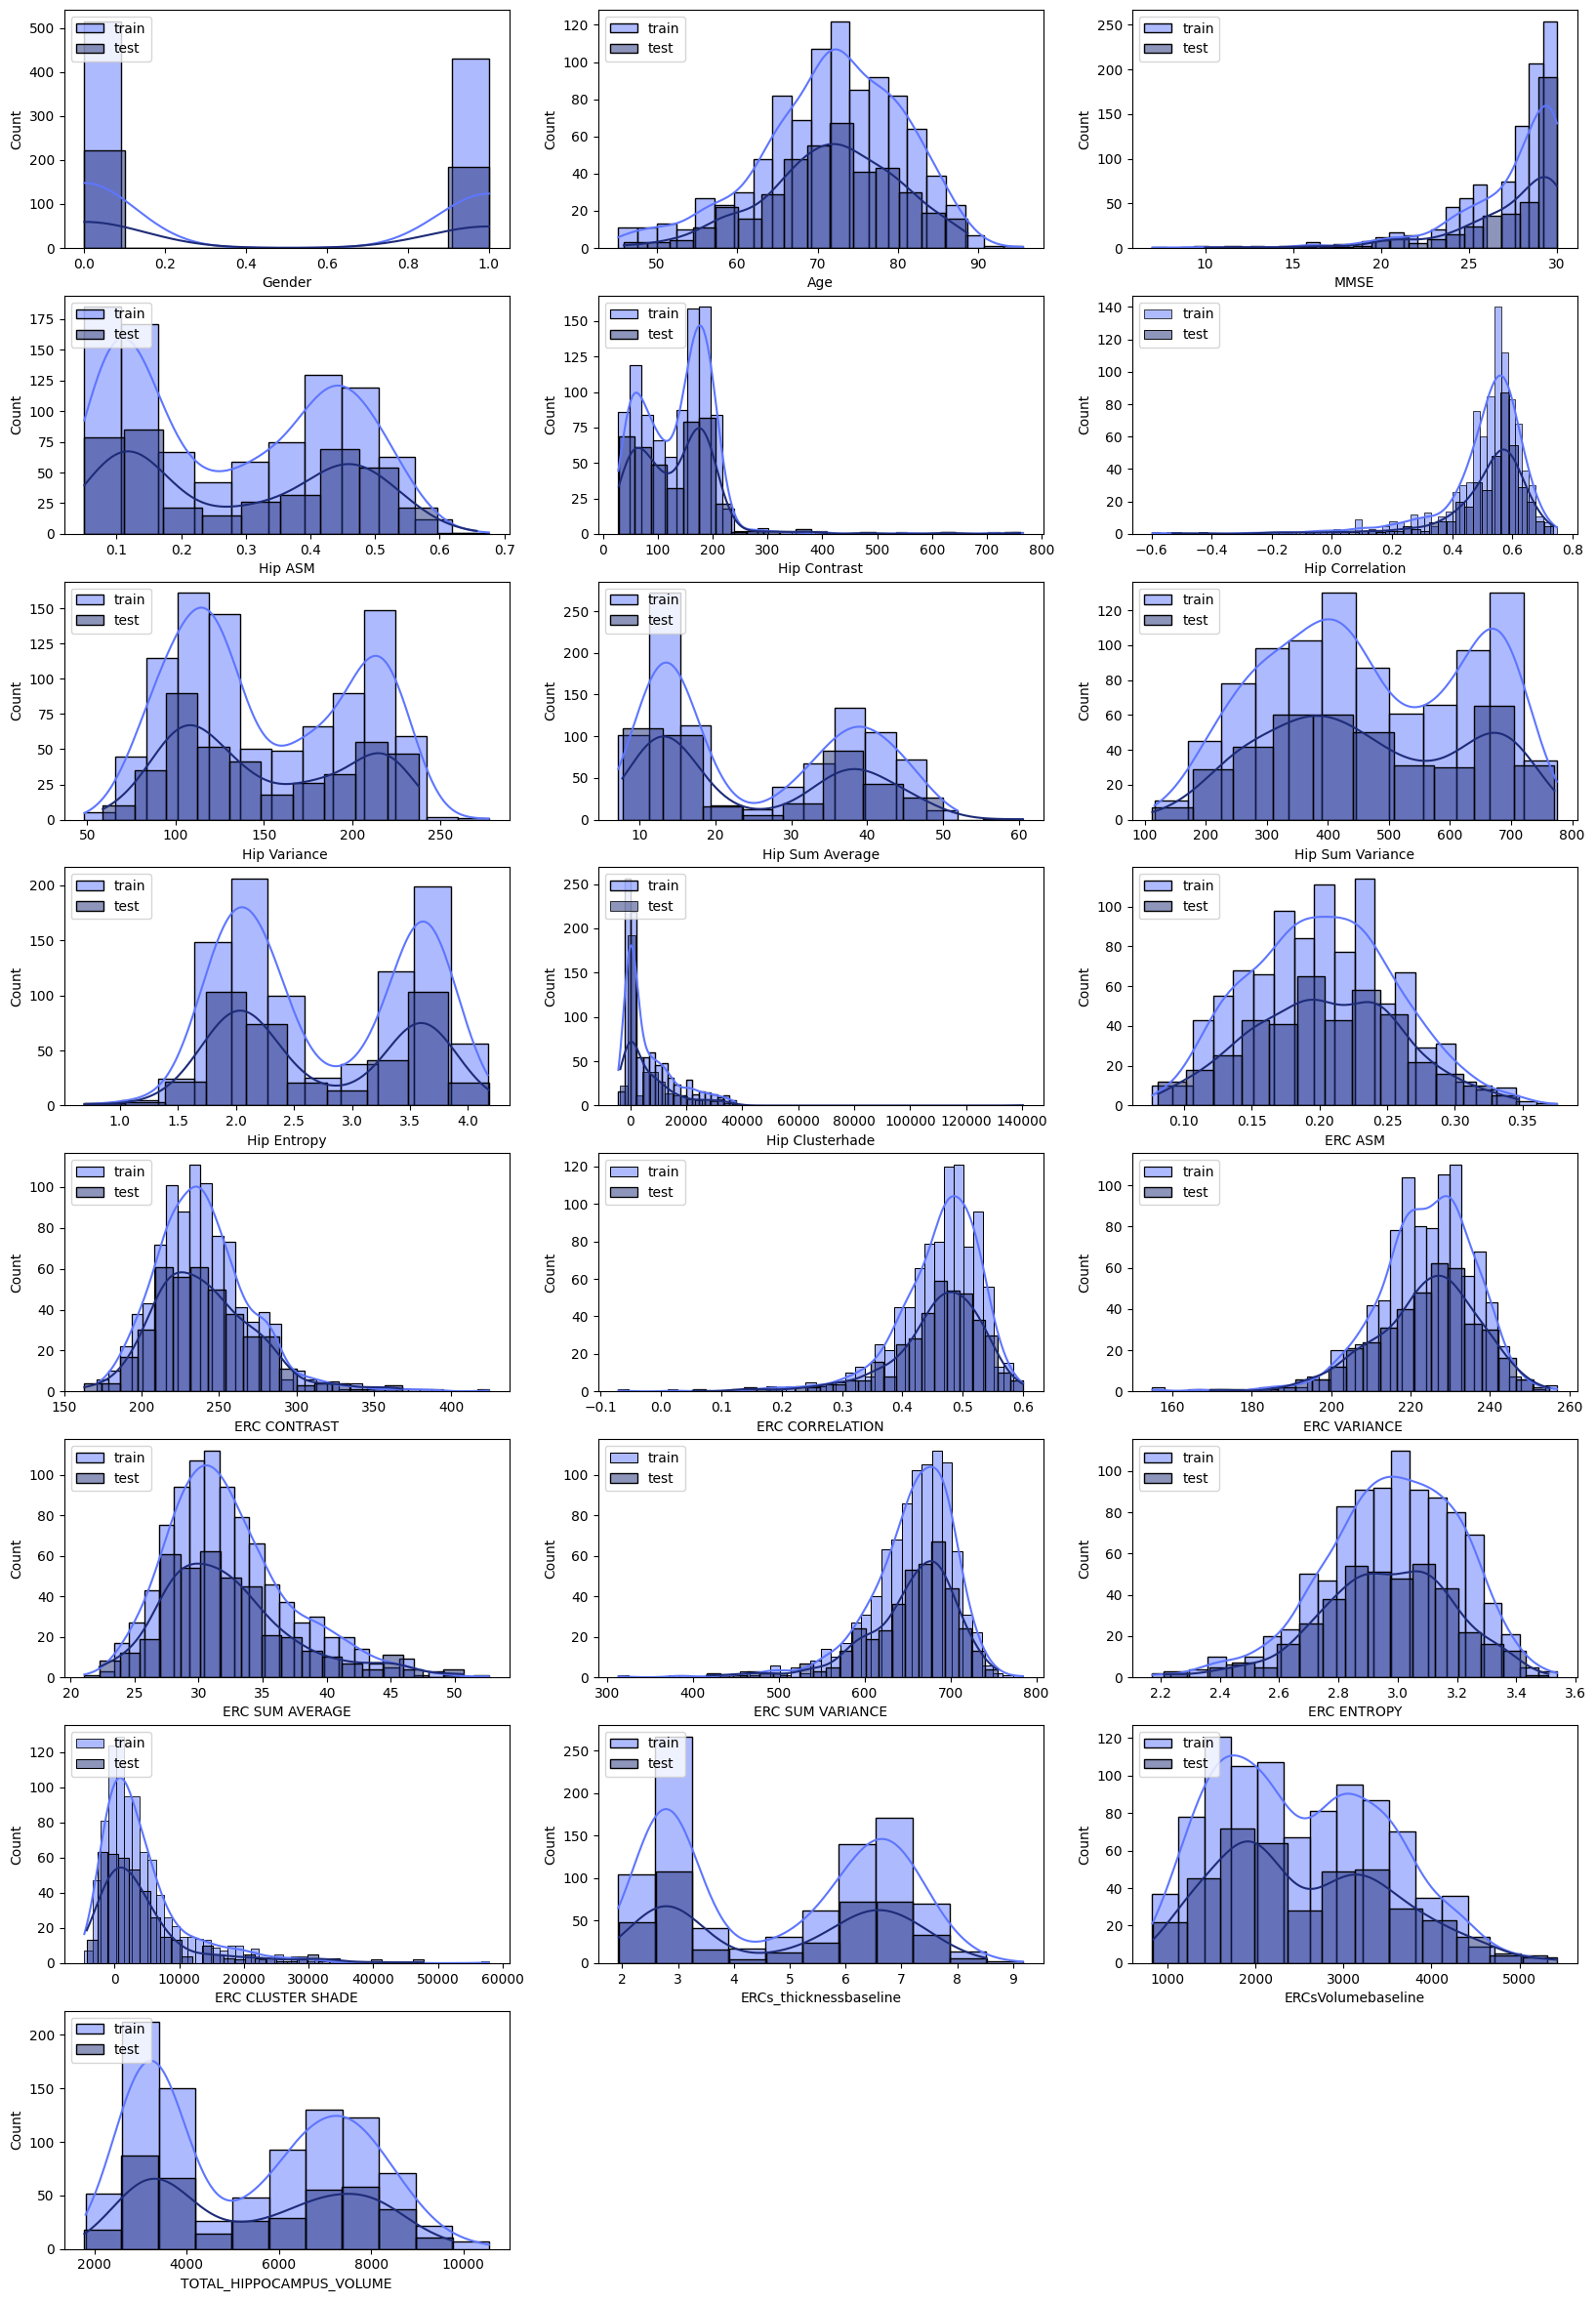

In [4]:
# Plot each column using histograms
plt.figure(figsize=(20, 45))

for i in range(len(X_train_vis.columns)):
    plt.subplot(12,3,i+1)
    sns.histplot(X_train_vis[X_train_vis.columns[i]], color="#5e76fe", kde = True, label="train")
    plt.legend(loc="upper left")


    plt.subplot(12,3,i+1)
    sns.histplot(X_test_vis[X_test_vis.columns[i]], color= "#1e2c78", kde = True, label="test")
    plt.legend(loc="upper left")


It appears that some observations are included in the test set while other values are excluded in the training set. 

The last graph is a good example - notice from left to right. 

Lets have a closer look

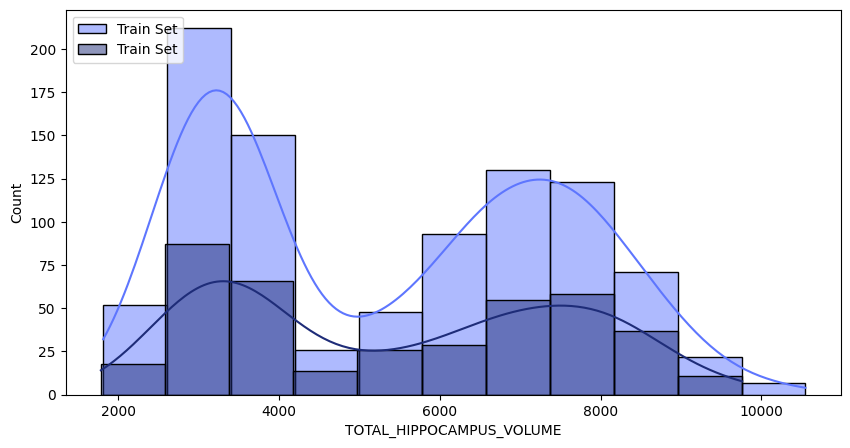

In [5]:
# Plot histogram of training/test set
plt.figure(figsize=(10, 5))

sns.histplot(X_train_vis["TOTAL_HIPPOCAMPUS_VOLUME"], color="#5e76fe", kde=True, label='Train Set', alpha=0.5)
sns.histplot(X_test_vis["TOTAL_HIPPOCAMPUS_VOLUME"], color="#1e2c78", kde=True, label='Train Set', alpha=0.5)
plt.legend(loc="upper left")

**This could be one of the few reasons why some of the models will underperform later on.**

Now lets check for the target split

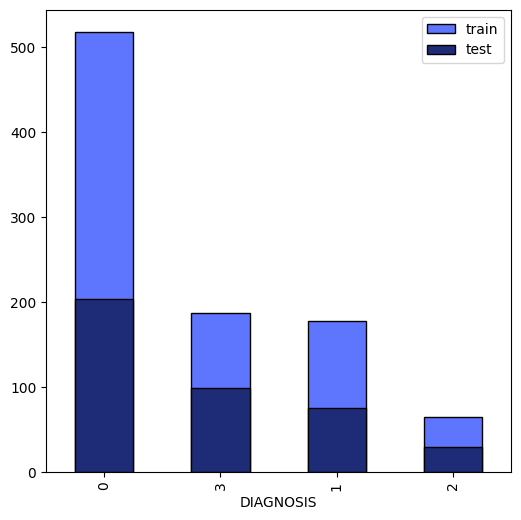

In [6]:
# Plot the target of training/test set using bar
plt.figure(figsize = (6,6))

y_train_vis.value_counts().plot(kind = "bar", 
                            color = "#5e76fe",
                            edgecolor = "black",
                            label="train",
)

y_test_vis.value_counts().plot(kind = "bar", 
                            color = "#1e2c78",
                            edgecolor = "black",
                            label="test",
)

plt.legend(loc="upper right")

In [7]:
y_train_vis.value_counts()

DIAGNOSIS
0    518
3    187
1    178
2     64
Name: count, dtype: int64

In [8]:
y_test_vis.value_counts()

DIAGNOSIS
0    204
3     99
1     75
2     29
Name: count, dtype: int64

### Removing null values

In [9]:
null_dataset = dataset.dropna()

In [10]:
X_train_vis_null, X_test_vis_null, y_train_vis_null, y_test_vis_null = train_test_split(null_dataset.drop(columns=["DIAGNOSIS"]), 
                                                    null_dataset["DIAGNOSIS"], 
                                                    test_size = .30, 
                                                    random_state = 42,
)

X_train_vis_null.shape, X_test_vis_null.shape, y_train_vis_null.shape, y_test_vis_null.shape

((825, 22), (354, 22), (825,), (354,))

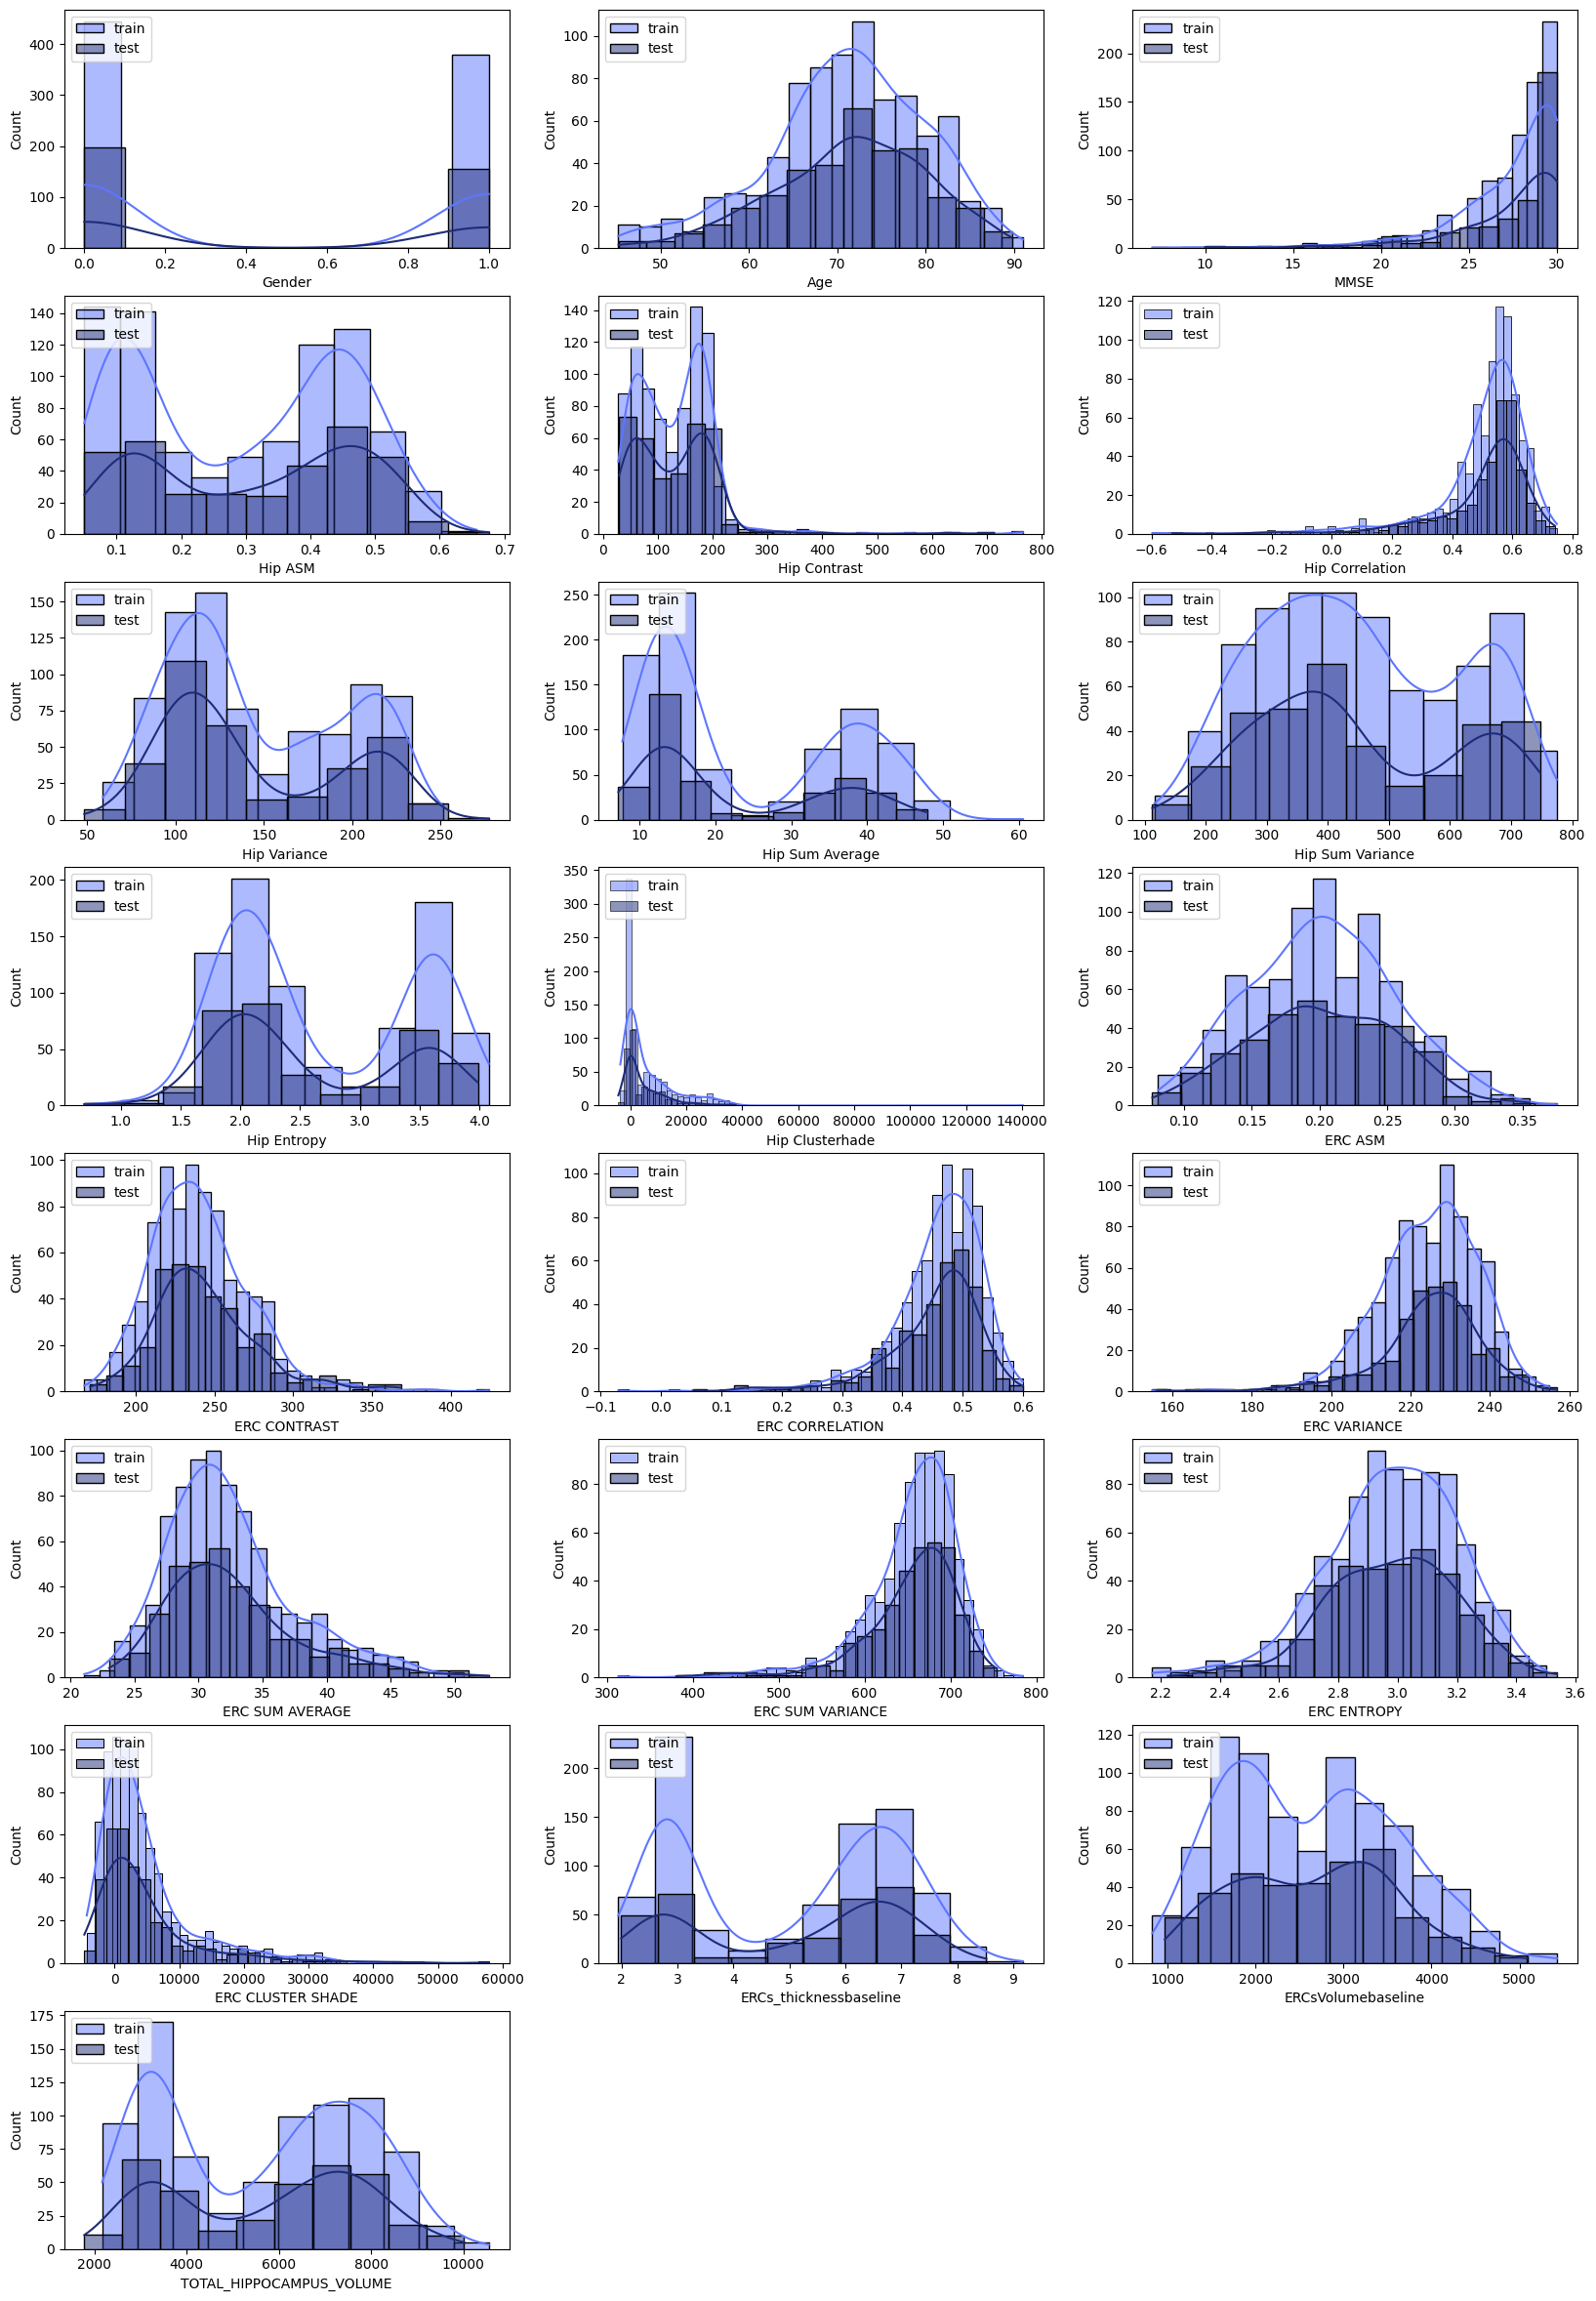

In [11]:
# Plot each column using histograms
plt.figure(figsize=(20, 45))

for i in range(len(X_train_vis_null.columns)):
    plt.subplot(12,3,i+1)
    sns.histplot(X_train_vis_null[X_train_vis_null.columns[i]], color="#5e76fe", kde = True, label="train")
    plt.legend(loc="upper left")


    plt.subplot(12,3,i+1)
    sns.histplot(X_test_vis_null[X_test_vis_null.columns[i]], color= "#1e2c78", kde = True, label="test")
    plt.legend(loc="upper left")


In [12]:
y_train_vis_null.value_counts()

DIAGNOSIS
0    448
3    170
1    157
2     50
Name: count, dtype: int64

In [13]:
y_test_vis_null.value_counts()

DIAGNOSIS
0    202
3     77
1     57
2     18
Name: count, dtype: int64

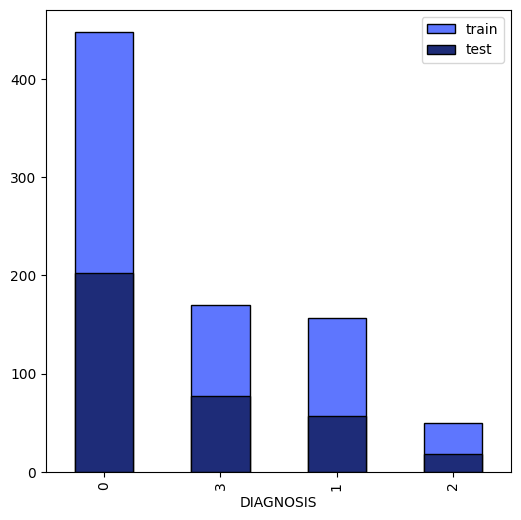

In [14]:
# Plot the target of training/test set using bar
plt.figure(figsize = (6,6))

y_train_vis_null.value_counts().plot(kind = "bar", 
                            color = "#5e76fe",
                            edgecolor = "black",
                            label="train",
)

y_test_vis_null.value_counts().plot(kind = "bar", 
                            color = "#1e2c78",
                            edgecolor = "black",
                            label="test",
)

plt.legend(loc="upper right")